In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import time
from scipy.stats import norm
import math

In [51]:
# Definisci i parametri dell'opzione e della simulazione di Monte Carlo
S0 = 500.0     # prezzo iniziale del sottostante
K = 570      # prezzo di esercizio dell'opzione
r = 0.05       # tasso di interesse senza rischio
sigma = 0.27375 # volatilità del sottostante
T = 0.6        # tempo di maturità dell'opzione (in anni)
N = 126       # numero di passi nella simulazione di Monte Carlo
M = 5000     # numero di percorsi nella simulazione di Monte Carlo
m = 126        # numero di osservazioni per l'Asian option

# Calcola gli intervalli di tempo per le osservazioni dell'Asian option
dt = T / m
t = np.linspace(dt, T, m)

# Genera i pesi per l'Asian option
weights = np.ones(m) / m

# Genera i percorsi del sottostante utilizzando una simulazione di Monte Carlo
S = np.zeros((M, N+1))
S[:,0] = S0
D = []
np.random.seed(42)
for i in range(M):
    for j in range(1, N+1):
        eps = np.random.normal()
        S[i,j] = S[i,j-1] * np.exp((r - 0.5 * sigma**2) * (T/N) + sigma * np.sqrt(T/N) * eps)
        D.append( S[i,j])

# Calcola il prezzo dell'opzione
payoffs = np.zeros(M)
for i in range(M):
    avg_price = np.dot(weights, S[i,1:m+1])
    payoff = max(avg_price - K, 0)
    payoffs[i] = payoff

price = np.mean(payoffs) * np.exp(-r * T)
print(f"Prezzo dell'Asian option: {price:.2f}")

Prezzo dell'Asian option: 5.91


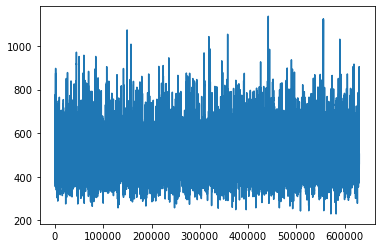

In [15]:
plt.plot(D)
plt.show()

In [52]:

# Definisci i parametri dell'opzione e della simulazione di Monte Carlo
S0 = 500.0     # prezzo iniziale del sottostante
K = 570  # prezzo di esercizio dell'opzione
k = 450 
r = 0.05       # tasso di interesse senza rischio
sigma = 0.2325125 # volatilità del sottostante
T = 1.5        # tempo di maturità dell'opzione (in anni)
N = 378      # numero di passi nella simulazione di Monte Carlo
M = 5000     # numero di percorsi nella simulazione di Monte Carlo

# Calcola i parametri per il modello di Black-Scholes
dt = T / N
df = np.exp(-r * dt)

D = []
# Genera i percorsi del sottostante utilizzando una simulazione di Monte Carlo
S = np.zeros((M, N+1))
S[:,0] = S0
np.random.seed(23)
for t in range(1, N+1):
    
    
    
    eps = np.random.normal(size=M)
    S[:,t] = S[:,t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * eps)
    D.append(S[:,t])

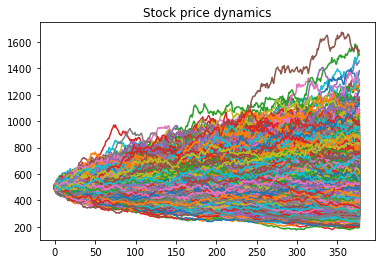

In [17]:
plt.plot(D)
plt.title ("Stock price dynamics")
plt.show()

In [53]:
import numpy as np

def cum_mean_array(S):
    D = np.zeros_like(S)
    for i in range(S.shape[0]):
        for j in range(S.shape[1]):
            D[i,j] = np.mean(S[i,:j+1])
    return D



In [54]:
G = cum_mean_array(S)


In [55]:
G.shape


(5000, 379)

In [56]:
K = 570
k = 450
n = 126
N = 378
CallEEpath = np.maximum(G[:,0:n] - K, 0)  # EE per ogni tempo per ognmi path
CallMtm = np.array(G[:,0:n] - K)


PutEEpath = np.maximum(k - G[:,:], 0)
PutMtm = np.array(k - G[:,:])

# Calculate expected exposure
PutEE= np.mean(PutEEpath, axis=0) # QUESTA E LA MEDIA DI TUTTI I PATH PER OGNI TIME PERIOD
CallEE= np.mean(CallEEpath, axis=0)

print(CallEE, PutEE)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.31736361e-04 7.78146616e-04 1.18223943e-03
 1.63227305e-03 2.13360253e-03 2.43394691e-03 2.63655461e-03
 2.67430074e-03 2.62927944e-03 2.41904468e-03 2.27502353e-03
 2.57391720e-03 2.73499365e-03 3.05933166e-03 4.59028843e-03
 6.64003653e-03 8.74670105e-03 1.14781599e-02 1.55550390e-02
 1.98322211e-02 2.43843770e-02 2.97297835e-02 3.67249434e-02
 4.39480317e-02 5.14756333e-02 5.99960012e-02 6.89957327e-02
 7.72946410e-02 8.65760483e-02 9.69254232e-02 1.07606388e-01
 1.19165384e-01 1.30835493e-01 1.42671612e-01 1.55200284e-01
 1.68261516e-01 1.82964004e-01 1.98312048e-01 2.15121563e-01
 2.32260948e-01 2.49914241e-01 2.68498401e-01 2.87433149e-01
 3.07296636e-01 3.27645635e-01 3.48001956e-01 3.69452558e-01
 3.91567877e-01 4.14057369e-01 4.37074465e-01 4.60449598e-01
 4.83386157e-01 5.079066

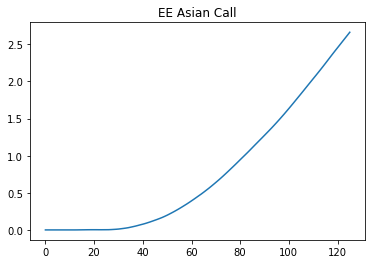

In [22]:
plt.plot(CallEE)
plt.title("EE Asian Call")
plt.show()

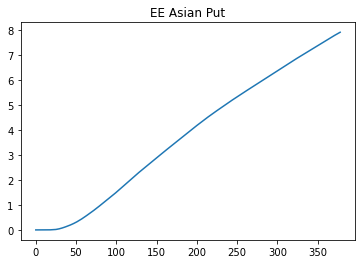

In [23]:
plt.plot(PutEE)
plt.title("EE Asian Put")
plt.show()

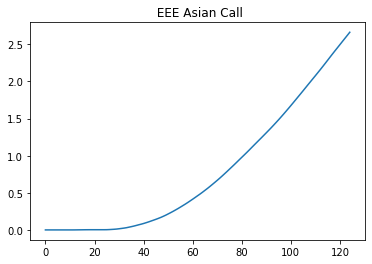

In [57]:
# EXPECTED POSITIVE EXPOSURE CALL

CallEEE = np.array([])

# inizializziamo il massimo cumulato come il primo elemento di EE
max_cumulato = CallEE[0]

# iteriamo su tutti gli elementi di EE tranne il primo
for i in range(1, CallEE.shape[0]):
    # calcoliamo il massimo cumulato tra l'i-esimo elemento di EE e il massimo cumulato fino a i-1
    max_cumulato = np.maximum(max_cumulato, CallEE[i])
    # aggiungiamo il massimo cumulato alla fine dell'array EEE
    CallEEE = np.append(CallEEE, max_cumulato)

# stampiamo i primi 10 elementi di EEE per verificare il risultato

plt.plot(CallEEE)
plt.title(" EEE Asian Call")
plt.show()

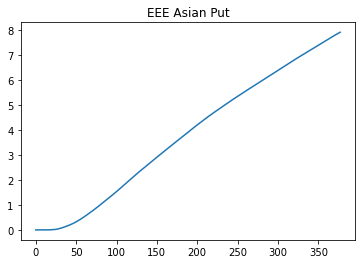

In [58]:
# EXPECTED POSITIVE EXPOSURE PUT

PutEEE = np.array([])

# inizializziamo il massimo cumulato come il primo elemento di EE
max_cumulato = PutEE[0]

# iteriamo su tutti gli elementi di EE tranne il primo
for i in range(1, PutEE.shape[0]):
    # calcoliamo il massimo cumulato tra l'i-esimo elemento di EE e il massimo cumulato fino a i-1
    max_cumulato = np.maximum(max_cumulato, PutEE[i])
    # aggiungiamo il massimo cumulato alla fine dell'array EEE
    PutEEE = np.append(PutEEE, max_cumulato)

# stampiamo i primi 10 elementi di EEE per verificare il risultato

plt.plot(PutEEE)
plt.title("EEE Asian Put")
plt.show()

In [59]:
# Effective EPE CALL & PUT   media EEE

CallEEPE = np.mean(CallEEE)
print(CallEEPE)


PutEEPE = np.mean(PutEEE)
print(PutEEPE)

0.7857082986231186
3.770288099618239


In [60]:
# EAD TRANSACATION LEVEL

aCEAD = 1.4 * CallEEPE
aPEAD = 1.4 * PutEEPE

print (aCEAD, aPEAD)

1.0999916180723661 5.278403339465534


In [61]:
#################à PFE CALL

#PFE  CALL

CallPFE97 = np.percentile(CallEE, q=97.5)

CallPFE2 = np.percentile(CallEE, q=2.5)

print(CallPFE2, CallPFE97)

0.0 2.533265724710576


In [62]:
#PFE PUT

PutPFE97 = np.percentile(PutEE, q=97.5)

PutPFE2 = np.percentile(PutEE, q=2.5)

print(PutPFE2, PutPFE97)

0.0 7.728797507308995


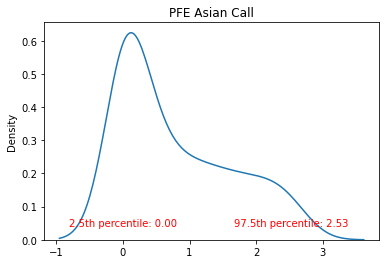

In [63]:
# Plot the kernel density estimate
import seaborn as sns

sns.kdeplot(CallEE)




# Add the percentiles as text to the plot
plt.text(CallPFE2, 0.05, f'2.5th percentile: {CallPFE2 :.2f}', ha='center', va='center', color='red')
plt.text(CallPFE97 , 0.05, f'97.5th percentile: {CallPFE97 :.2f}', ha='center', va='center', color='red')

# Show the plot
plt.title("PFE Asian Call")
plt.show()


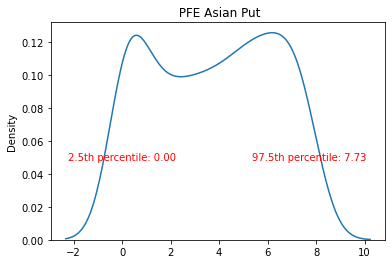

In [64]:
# Plot the kernel density estimate
import seaborn as sns

sns.kdeplot(PutEE)




# Add the percentiles as text to the plot
plt.text(PutPFE2, 0.05, f'2.5th percentile: {PutPFE2 :.2f}', ha='center', va='center', color='red')
plt.text(PutPFE97 , 0.05, f'97.5th percentile: {PutPFE97 :.2f}', ha='center', va='center', color='red')

# Show the plot
plt.title(" PFE Asian Put")
plt.show()


In [65]:
Mcall = MA(CallEE, CallEEE)
Mput = MA(PutEE, PutEEE)
print(Mcall,Mput)

1.9048300482380434 1.9048374180359597


In [66]:
CallRWA = RWA_calc(0.0014, aCEAD, Mcall)


b: 0.2289573550290912
K: 0.018902250832308284
RWA: 0.25990396847800645


In [67]:
PutRWA = RWA_calc(0.0014, aPEAD, Mput)


b: 0.2289573550290912
K: 0.01890228775938778
RWA: 1.2471737354086367


# PORTFOLIO LEVEL

In [68]:
EE_totale = []

# somma i primi 252 elementi di Cm con i primi 252 elementi di Pm
EE_totale[:126]= CallEE + PutEE[:126]

# somma i valori dalla colonna 253 alla colonna 504 di ogni riga di Pm
EE_totale[ 125:] = PutEE[126:]

# stampa l'array risultato


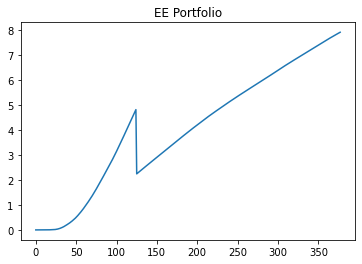

In [38]:
plt.plot(EE_totale)
plt.title("EE Portfolio")
plt.show()

# PERCHE AUMENTA MENTRE NELL'ALTRA DIMINUISCE ?

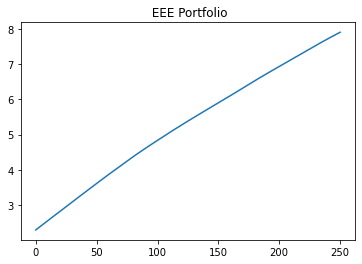

In [69]:
###################### EEE


totalEEE = np.array([])

# inizializziamo il massimo cumulato come il primo elemento di EE
max_cumulato = EE_totale[0]

# iteriamo su tutti gli elementi di EE tranne il primo
for i in range(1, 126):
    # calcoliamo il massimo cumulato tra l'i-esimo elemento di EE e il massimo cumulato fino a i-1
    max_cumulato = np.maximum(max_cumulato, EE_totale[i])
    # aggiungiamo il massimo cumulato alla fine dell'array EEE
    toEEE = np.append(totalEEE, max_cumulato)

max_cumulato = EE_totale[127]
    
for i in range(127, 378):
     max_cumulato = np.maximum(max_cumulato, EE_totale[i])
     # aggiungiamo il massimo cumulato alla fine dell'array EEE
     totalEEE = np.append(totalEEE, max_cumulato)
    
# stampiamo i primi 10 elementi di EEE per verificare il risultato

plt.plot(totalEEE)
plt.title(" EEE Portfolio")
plt.show()

In [70]:
totalEEPE = np.mean(totalEEE)
print(totalEEPE)


5.282971199928251


In [71]:
aNCEAD = 1.4 * totalEEPE

print (aNCEAD)

7.396159679899551


In [72]:
NettedPFE97 = np.percentile(EE_totale, q=97.5)

NettedPFE2 = np.percentile(EE_totale, q=2.5)

print(NettedPFE2,NettedPFE97)

0.0 7.7292621832154795


In [73]:
def MA(EE, EEE):
    """
    Computes the maturity adjustment as the sum of EE divided by the sum of EEE.

    Parameters:
    EE (numpy.ndarray): Array of expected exposures
    EEE (numpy.ndarray): Array of effective positive exposures

    Returns:
    float: The computed maturity adjustment
    """
    return  min(5, (1+ (EE.sum()* np.exp(-r)) / EEE.sum() * np.exp(-r) ))

In [44]:
EE_totale = np.array(EE_totale)

In [45]:
Masian = MA(EE_totale, totalEEE)
Masian

2.0361791645108727

In [49]:
LGD = 0.6
R = 0.14678

def RWA_calc(PD, EAD, M):
    x = (1 - R) ** -0.5 * norm.ppf(PD) + (R / (1 - R)) ** 0.5 * norm.ppf(0.999)
    b = (0.11852-0.05478*math.log(PD))**2
    K = (LGD * norm.cdf(x) - LGD * PD) * (1 - 1.5 * b) ** -1 * (1 + (M - 2.5) * b)

    RWA = 12.5 * K * EAD

    print("b:", b)
    print("K:", K)
    print("RWA:", RWA)


In [ ]:
NettedPFE97 = np.percentile(EE_totale, q=97.5)

NettedPFE2 = np.percentile(EE_totale, q=2.5)

print(NettedPFE2,NettedPFE97)

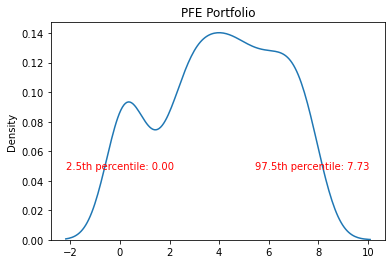

In [98]:
# Plot the kernel density estimate
import seaborn as sns

sns.kdeplot(EE_totale)




# Add the percentiles as text to the plot
plt.text(NettedPFE2, 0.05, f'2.5th percentile: {NettedPFE2 :.2f}', ha='center', va='center', color='red')
plt.text(NettedPFE97 , 0.05, f'97.5th percentile: {NettedPFE97 :.2f}', ha='center', va='center', color='red')

# Show the plot
plt.title("PFE Portfolio")
plt.show()
